# 🚢 Titanic Survival Analysis – College & Internship Level Project

**Project Type:** Exploratory Data Analysis (EDA)

**Objective:**
This project was done to deeply understand how different factors like gender, age, class, fare, and family size affected survival on the Titanic. The focus is on **data cleaning, visualization, and interpretation**, not just plotting graphs but understanding *why* patterns exist.

*All analysis, observations, and plots were done step by step as part of my learning process.*

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")

## 2. Load Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation:**
- Each row represents one passenger
- `Survived` is the target column (0 = Not Survived, 1 = Survived)

## 3. Basic Data Understanding

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Initial Findings:**
- Dataset contains missing values
- Fare values vary a lot, indicating possible outliers
- Survival rate is clearly less than 50%

## 4. Missing Value Analysis

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling Strategy:**
- Cabin has too many missing values → drop
- Age has numeric missing values → fill with median
- Embarked has very few missing values → fill with mode

## 5. Data Cleaning

In [7]:
df.drop(columns=["Cabin"], inplace=True, errors="ignore")
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 6. Exploratory Data Analysis (EDA)

### 6.1 Survival Count

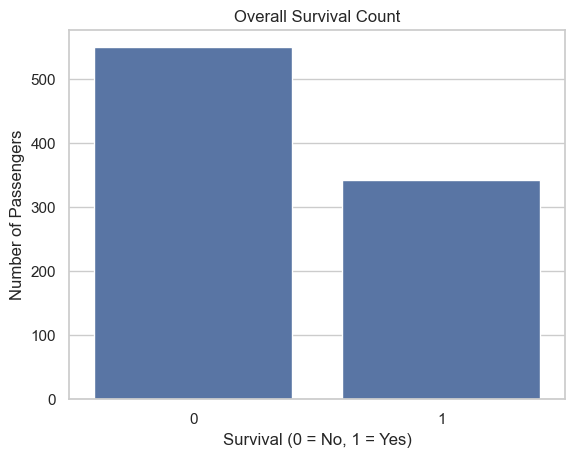

In [8]:
sns.countplot(x="Survived", data=df)
plt.title("Overall Survival Count")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

**Insight:**
More passengers did not survive than survived. This shows the severity of the disaster.

### 6.2 Survival by Gender

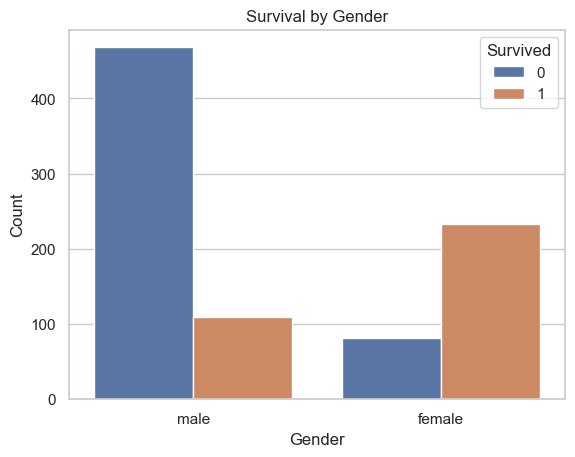

In [9]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Insight:**
Females survived much more than males. This supports the historical rule of "women and children first" during evacuation.

### 6.3 Survival by Passenger Class

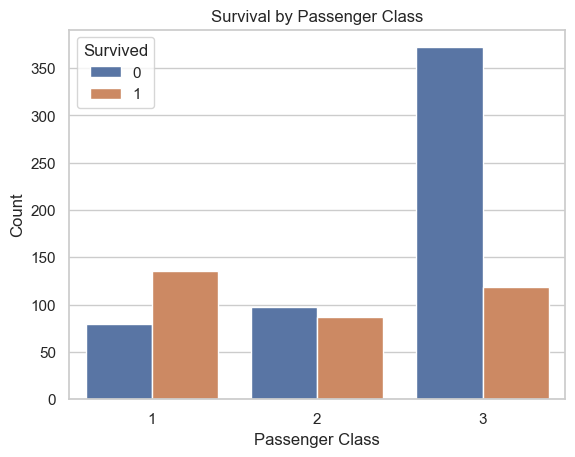

In [10]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

**Insight:**
First class passengers had the highest survival rate, while third class passengers faced the highest number of deaths.

### 6.4 Survival by Embarked Port

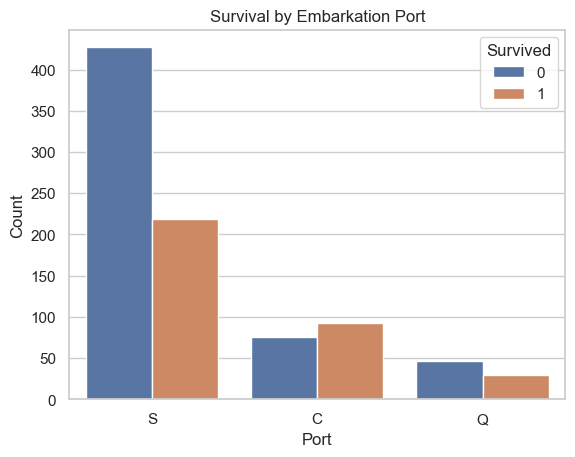

In [11]:
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarkation Port")
plt.xlabel("Port")
plt.ylabel("Count")
plt.show()

**Insight:**
Passengers embarking from Cherbourg (C) had relatively higher survival rates.

### 6.5 Age Distribution

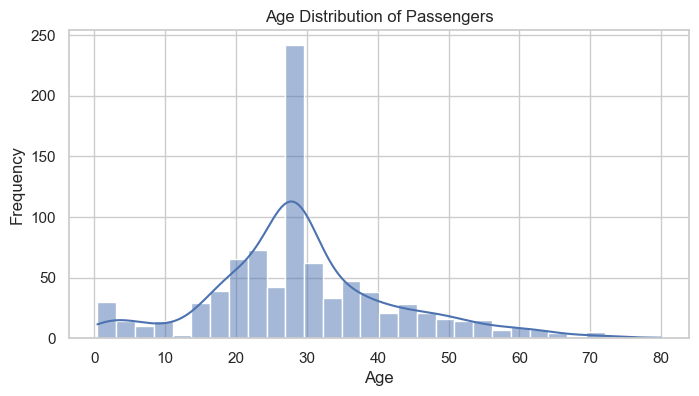

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### 6.6 Age vs Survival

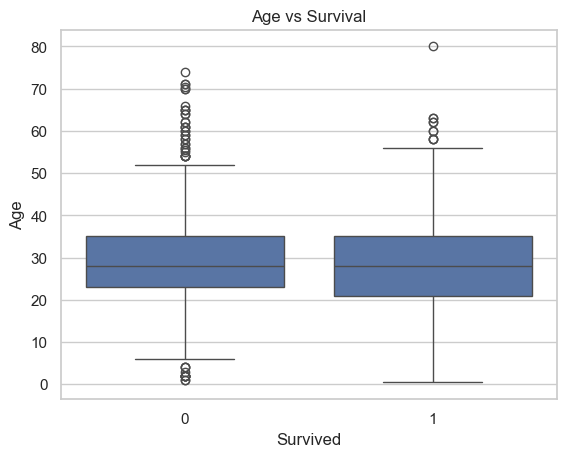

In [13]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()

**Insight:**
Children had better chances of survival compared to older passengers.

### 6.7 Fare Distribution

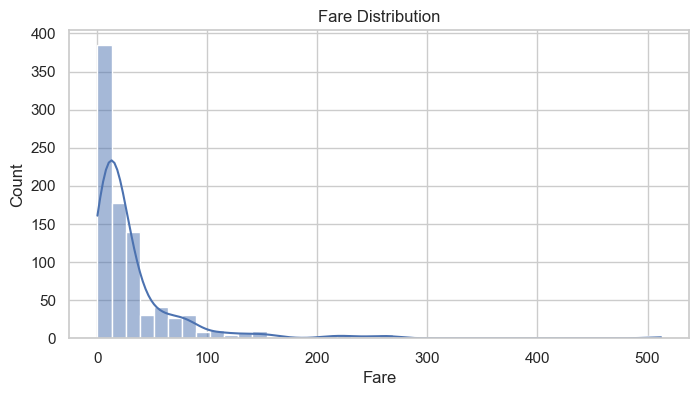

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df["Fare"], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

### 6.8 Fare vs Survival

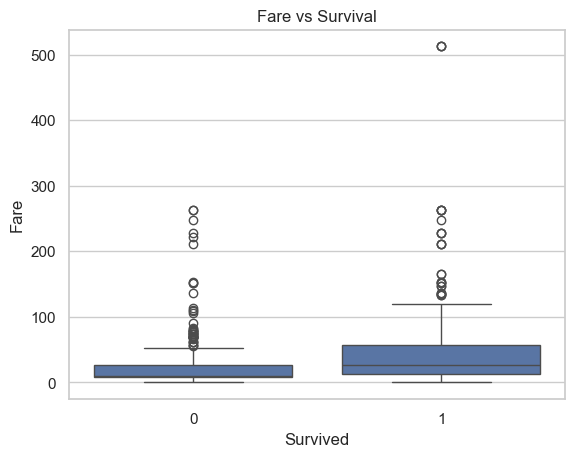

In [15]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()

**Insight:**
Higher ticket prices are associated with higher survival probability.

# 7. Feature Engineering

In [16]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = np.where(df["FamilySize"] == 1, 1, 0)

df[["FamilySize", "IsAlone"]].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


**Why this matters:**
Family size helps us understand whether traveling alone or with family influenced survival.

### 7.1 Survival: Alone vs With Family

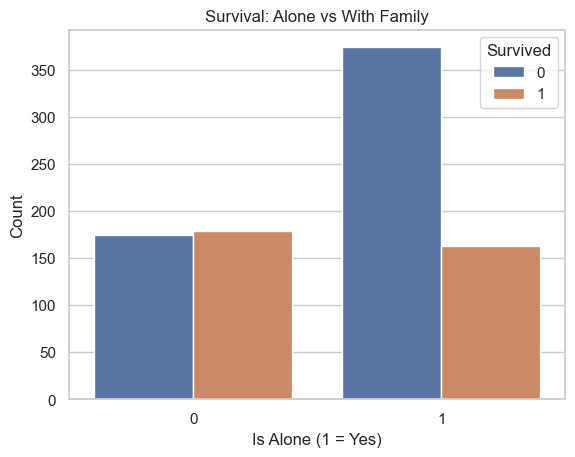

In [17]:
sns.countplot(x="IsAlone", hue="Survived", data=df)
plt.title("Survival: Alone vs With Family")
plt.xlabel("Is Alone (1 = Yes)")
plt.ylabel("Count")
plt.show()

# 8. Correlation Analysis

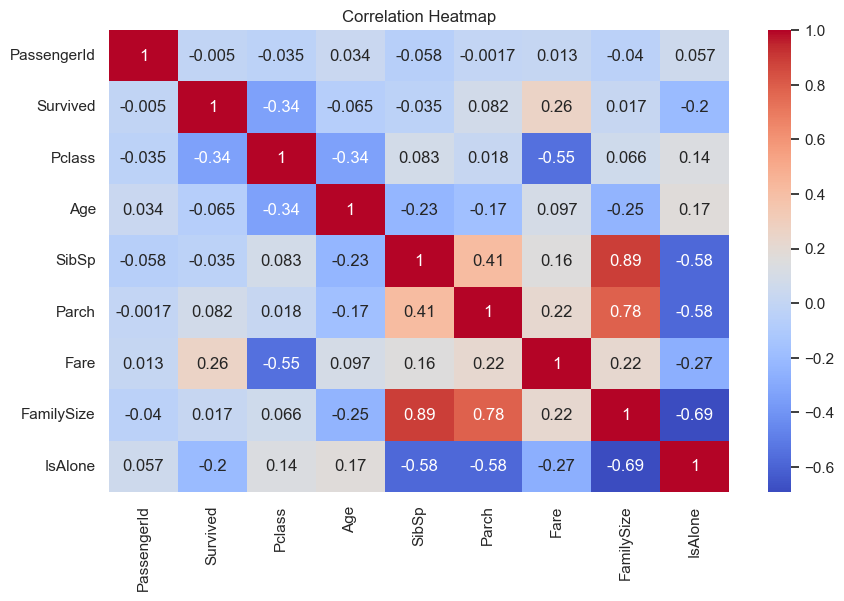

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 9. Final Conclusion

- Gender, class, age, fare, and family size strongly influenced survival
- Data cleaning was crucial before visualization
- Visual analysis helped uncover hidden patterns

This project helped me strengthen my understanding of real-world data analysis using Python.